In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Louding The Data
hourly_data = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter01/data/hour.csv')

In [3]:
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Some information about the data
print(f"Shape of the data: {hourly_data.shape}")
print(f"Number of Missing values: {hourly_data.isnull().sum().sum()}")

Shape of the data: (17379, 17)
Number of Missing values: 0


In [5]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
#Some Statistics analysis on the numerical columns
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [7]:
#creating a copy of the data named "pp_data" preprocessed data 
pp_data = hourly_data.copy()

In [8]:
# Mapping the season column from numerical into a categorical variable
seasons_mapping = {1:'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
pp_data['season'] = pp_data['season'].apply(lambda x: seasons_mapping[x])

In [9]:
# Mapping the yr column from 0 , 1 to 2011 , 2012
yr_mapping = {0: 2011, 1: 2012}
pp_data['yr'] = pp_data['yr'].apply(lambda x: yr_mapping[x])

In [10]:
# Mapping the weekday column from numerical into a categorical variable
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
pp_data['weekday'] = pp_data['weekday'].apply(lambda x: weekday_mapping[x])

In [11]:
# Mapping the weathersit column from numerical into a categorical variable
weather_mapping = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
pp_data['weathersit'] = pp_data['weathersit'].apply(lambda x: weather_mapping[x])

In [12]:
# transforming the hum column into percentage by multybling it by 100
# transforming the windspeed into its values between 0 : 67 so i will multiply it by 67
pp_data['hum'] = pp_data['hum']*100
pp_data['windspeed'] = pp_data['windspeed']*67

In [13]:
# Visualizing the results of our transformations using sample function
trans_cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
# Removing the instance column
pp_data.drop(['instant'],axis=1,inplace=True)
pp_data[trans_cols].sample(10, random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,spring,2012,Friday,cloudy,89.0,12.9980
3262,spring,2011,Friday,clear,64.0,7.0015
10763,spring,2012,Thursday,clear,42.0,23.9994
12384,spring,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


In [14]:
pp_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,winter,2011,1,0,0,Saturday,0,clear,0.24,0.2879,81.0,0.0,3,13,16
1,2011-01-01,winter,2011,1,1,0,Saturday,0,clear,0.22,0.2727,80.0,0.0,8,32,40
2,2011-01-01,winter,2011,1,2,0,Saturday,0,clear,0.22,0.2727,80.0,0.0,5,27,32
3,2011-01-01,winter,2011,1,3,0,Saturday,0,clear,0.24,0.2879,75.0,0.0,3,10,13
4,2011-01-01,winter,2011,1,4,0,Saturday,0,clear,0.24,0.2879,75.0,0.0,0,1,1


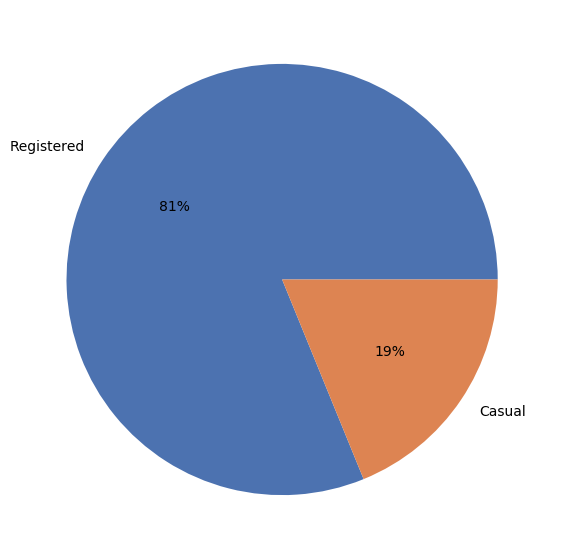

In [100]:
# Pie chart of the registered and casual rides
labels = ["Registered","Casual"]
colors = sns.color_palette('deep')[0:5]
plt.figure(figsize=(15,7))
plt.pie([pp_data["registered"].sum(),pp_data["casual"].sum()], labels=labels, colors=colors, autopct='%.0f%%') 
plt.show()

Text(0.5, 1.0, 'Rides distributions')

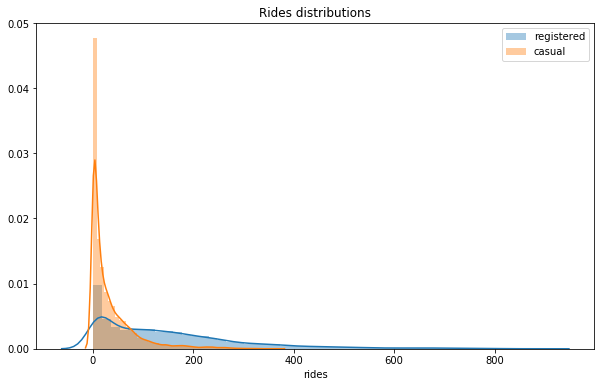

In [15]:
# Plot distributions of registered vs casual rides
#sns.set(rc={'figure.figsize':(15,6)})
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(pp_data['registered'], label='registered')
sns.distplot(pp_data['casual'], label='casual')
plt.style.use('default')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")

### We can observe that the majority of rides are registered, surpassing the number of casual rides.


#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

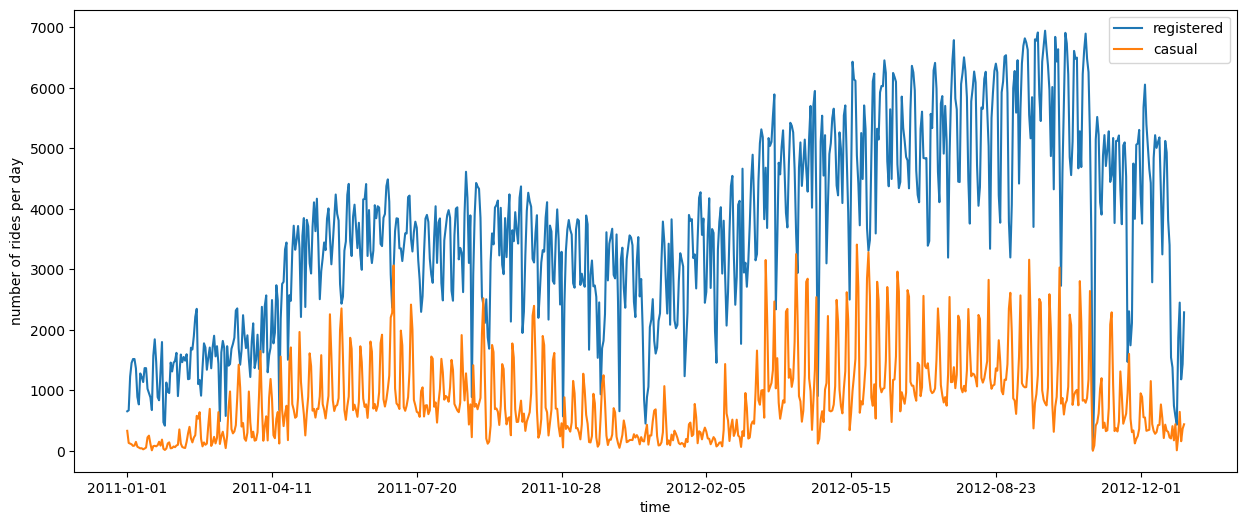

In [16]:
# Evolution of rides over time (days)
plot_data = pp_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(15,6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");

### From the above plot, we can see that the number of registered rides is consistently higher than that of casual rides per day.
### Furthermore, we observe that the number of rides for both registered and casual users tends to increase in spring and summer (favorable weather for biking) and decreases in winter (due to inclement weather, including rain, snow, and high wind speeds—consistent with our expectations, as these conditions have a negative impact on the number of rides).

### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

### Due to a lot of variance in the time series plot, the only way to smooth out the curves is to take the rolling mean and standard deviation of the time series and plot those instead. This allows to visualize the average number of rides for a specific time period and the expected deviation from its mean.

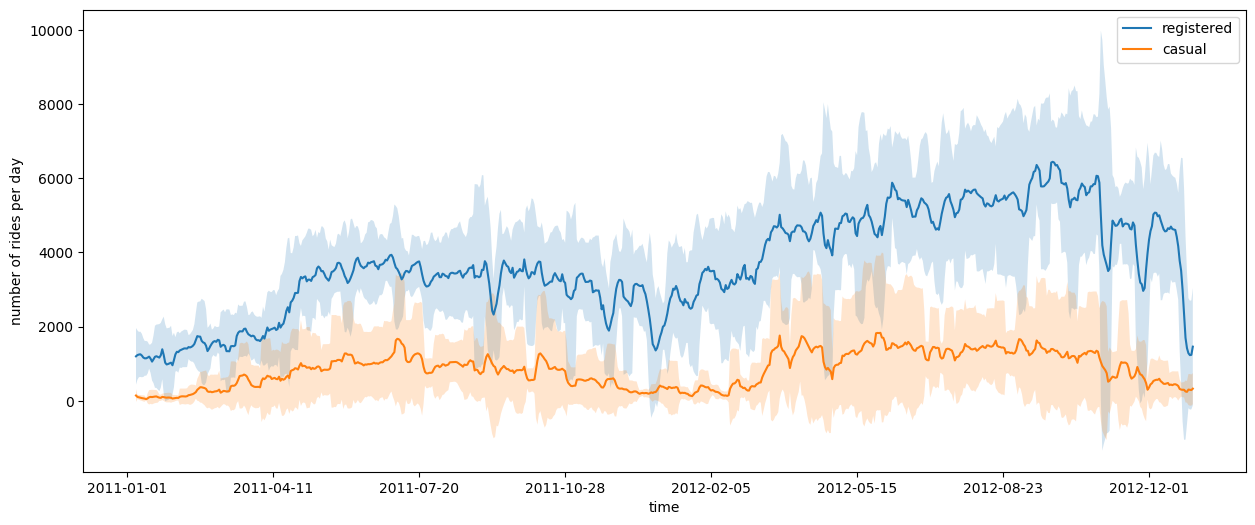

In [17]:
"""
Create new dataframe with necessary for plotting columns, and obtain
number of rides per day, by grouping over each day
"""
plot_data = pp_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()
"""
define window for computing the rolling mean and standard deviation
"""
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()
"""
Create a plot of the series, where we first plot the series of rolling
means, then we color the zone between the series of rolling means +- 2
rolling standard deviations
"""
ax = rolling_means.plot(figsize=(15,6))

ax.fill_between(rolling_means.index, rolling_means['registered'] + 2*rolling_deviations['registered'], \
rolling_means['registered'] - 2*rolling_deviations['registered'], alpha = 0.2)

ax.fill_between(rolling_means.index, rolling_means['casual'] + 2*rolling_deviations['casual'], \
rolling_means['casual'] - 2*rolling_deviations['casual'], alpha = 0.2)

ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");

### The new time series is in line with the previous insight that the total number of rides is increasing in summer and spring and decreasing in winter.

### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Ploting the requests for each the registered and casual of each days of the week over separate hours

C:\Users\97158\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


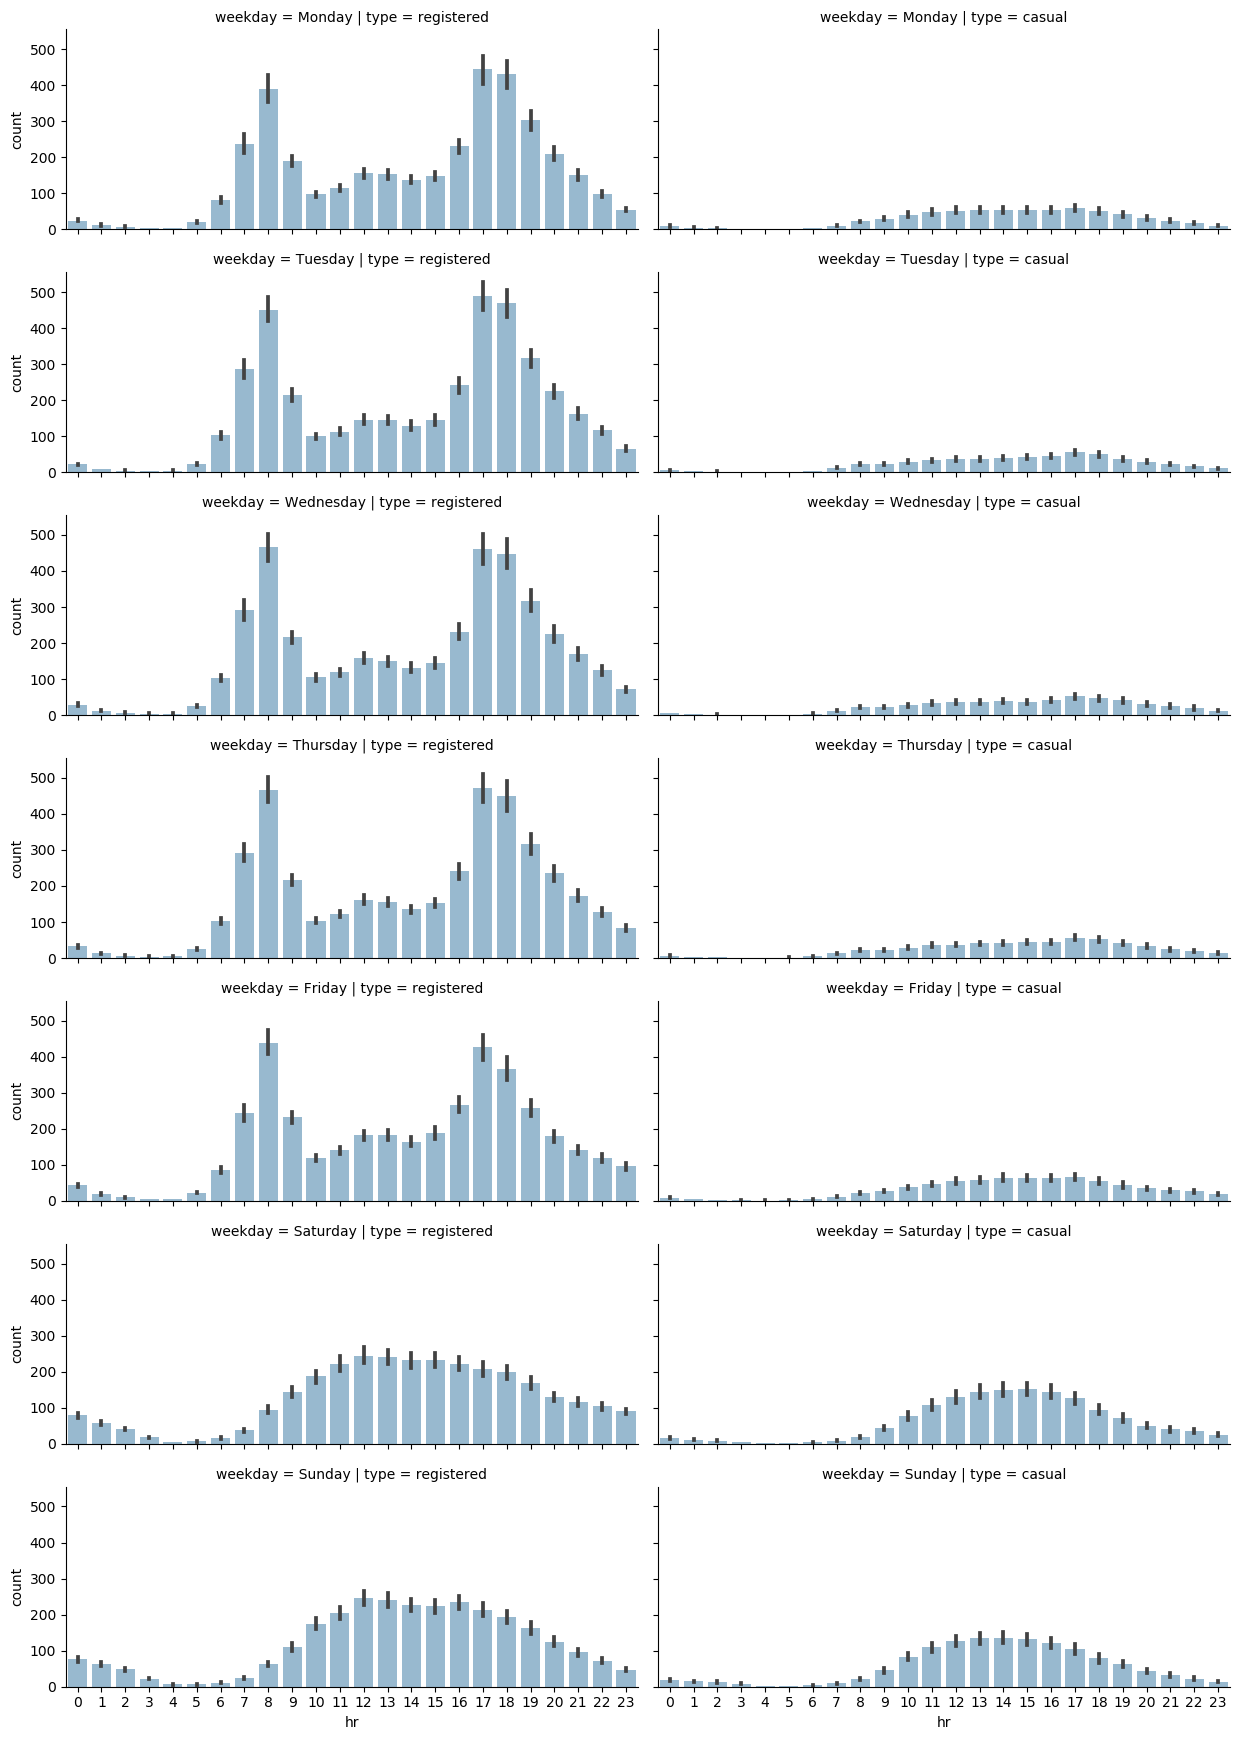

In [18]:
# select relevant columns
plot_data = pp_data[['hr', 'weekday', 'registered', 'casual']]
"""
transform the data into a format, in number of entries are computed as
count,
for each distinct hr, weekday and type (registered or casual)
"""
plot_data = plot_data.melt(id_vars=['hr', 'weekday'], var_name='type', value_name='count')
"""
create FacetGrid object, in which a grid plot is produced.
As columns, we have the various days of the week,
as rows, the different types (registered and casual)
"""
grid = sns.FacetGrid(plot_data, row='weekday', col='type', height=2.5, aspect=2.5, \
row_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)

### In the above plots, most of the usage of the bike-sharing services for registered users occurs during the working days, around 7 am to 10 am, and again around 3 pm to 10/11 pm.
### All plots have the same distribution, but on the weekend days, both registered and casual distributions change. 
### There is a slight growth in the usage of casual requests during the weekend.
### For the registered plots on the weekend, the number of rides is lower than the growth on working days.

### ------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Analyzing Seasonal Impact on Rides (Season - hr )

C:\Users\97158\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


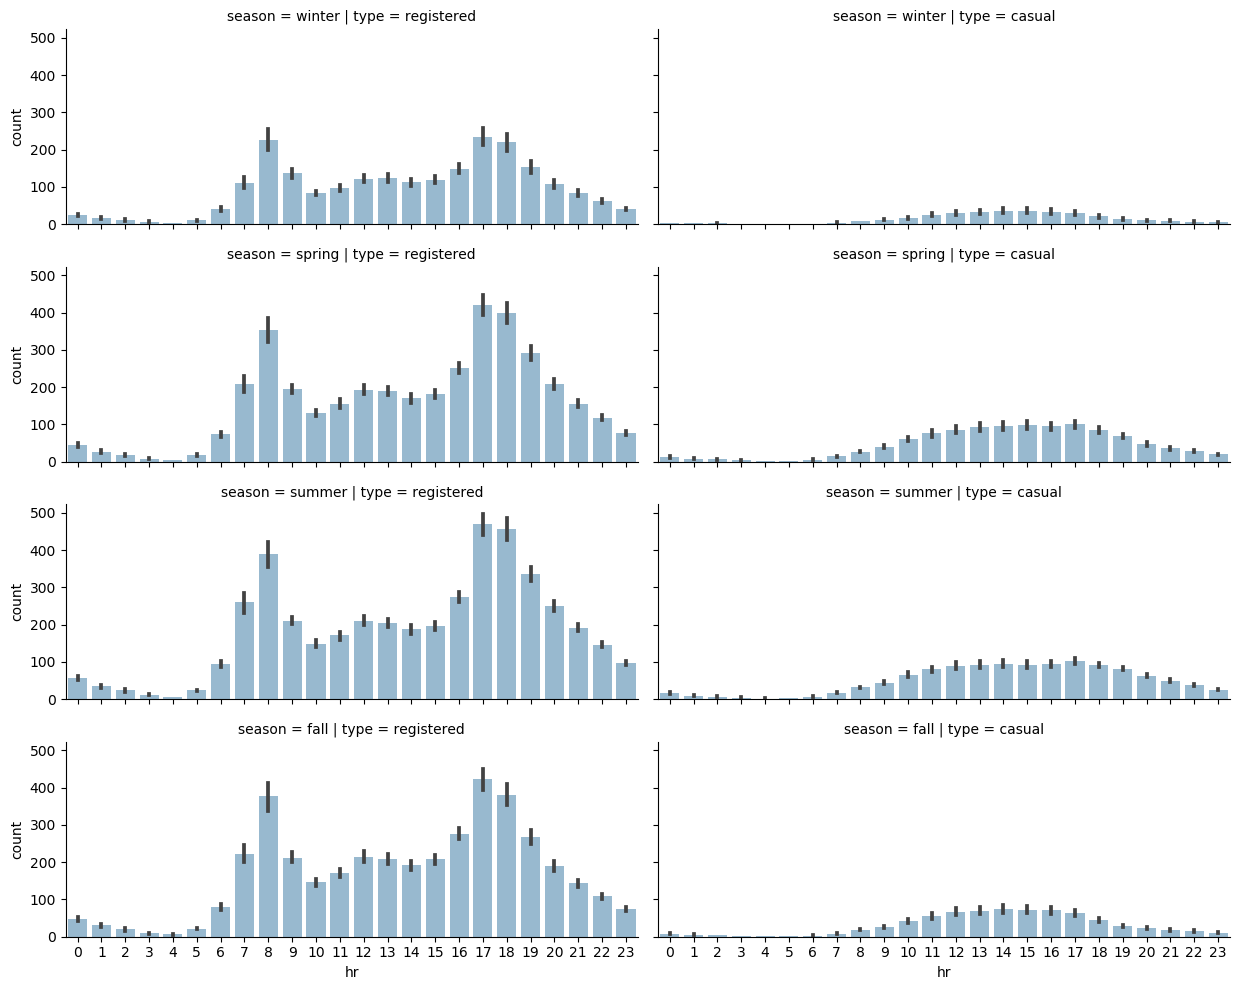

In [19]:
# select subset of the data
plot_data = pp_data[['hr', 'season','registered', 'casual']]

# unpivot data from wide to long format
plot_data = plot_data.melt(id_vars=['hr','season'], var_name='type', value_name='count')

# define FacetGrid
grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5, row_order=['winter','spring','summer','fall'])

# apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)

### From the above plots, it's obvious that the usage of bike-sharing services is lower in winter than in all other seasons for both registered and casual users, attributed to the bad weather. The shape of the curves remains the same for both types in all other seasons.

### ------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Analyzing Seasonal Impact on Rides (Season - day )


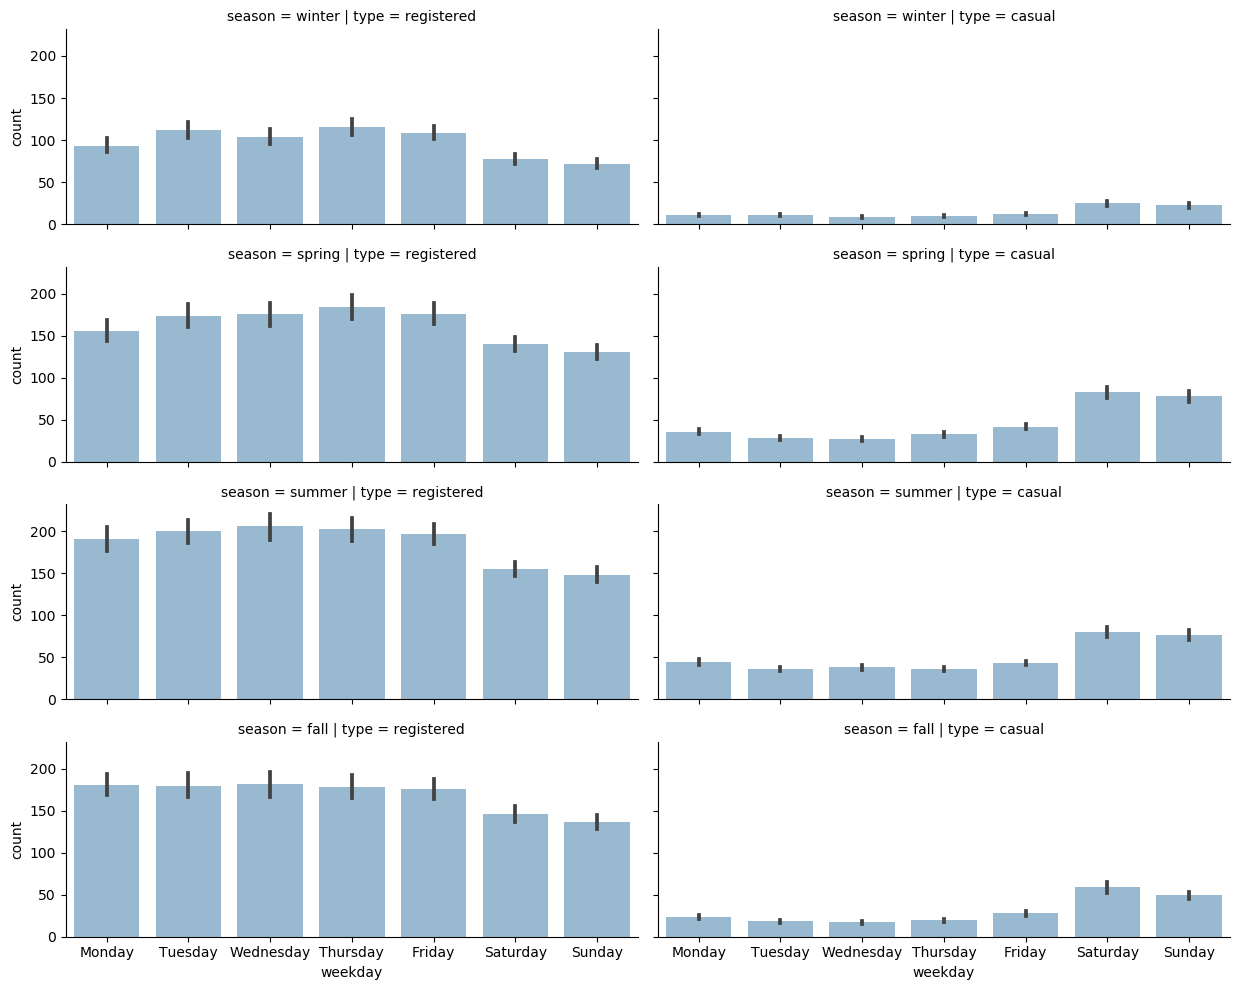

In [20]:
plot_data = pp_data[['weekday', 'season','registered', 'casual']]
plot_data = plot_data.melt(id_vars=['weekday', 'season'],var_name='type', value_name='count')

grid = sns.FacetGrid(plot_data, row='season', col='type', \
height=2.5, aspect=2.5, row_order=['winter', 'spring', 'summer', 'fall'])
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', \
'Friday', 'Saturday', 'Sunday'])

###  There is a decreasing number of registered rides over the weekend compared to the rest of the week, while the number of casual rides increases.
### I can observe that registered customers mostly use the bike-sharing service for commuting, which could be the reason for the decreasing number of registered rides over the weekend 
### In contrast, casual customers use the service occasionally over the weekend.

## Hypothesis Testing on Registered Rides

#### H_0 : average registered rides over weekdays-average registered rides over weekend = 0

#### H_a : average registered rides over weekdays-average registered rides over weekend ≠ 0

In [21]:
# define mask, indicating if the day is weekend or work day
weekend_days = ['Saturday', 'Sunday']
weekend_mask = pp_data.weekday.isin(weekend_days)
workingdays_mask = ~pp_data.weekday.isin(weekend_days)
# select registered rides for the weekend and working days
weekend_data = pp_data.registered[weekend_mask]
workingdays_data = pp_data.registered[workingdays_mask]

In [22]:
# Perform ttest
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

Statistic value: -16.004, p-value: 0.000


The resulting p-value from this test is less than 0.0001, which is far below the standard critical value of 0.05. In conclusion, we can reject the null hypothesis and confirm that our initial observation is correct: there is a statistically significant difference between the number of rides performed during working days and the weekend.

Text(0.5, 1.0, 'Registered rides distributions')

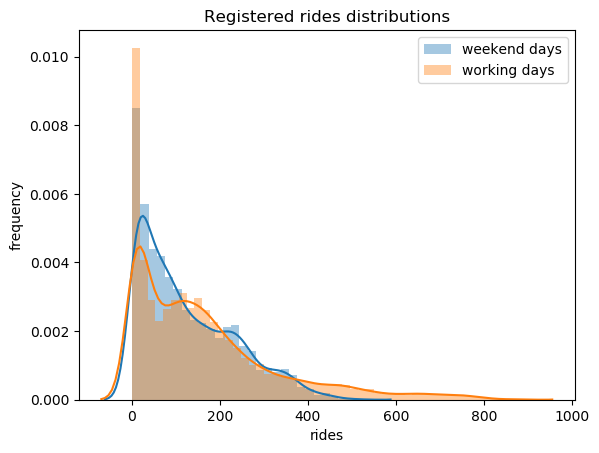

In [23]:
"""
plot distributions of registered rides for working vs weekend days
"""
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered rides distributions")

### Same Test for Casual users

Statistic value: 41.077, p-value: 0.000


Text(0.5, 1.0, 'Casual rides distributions')

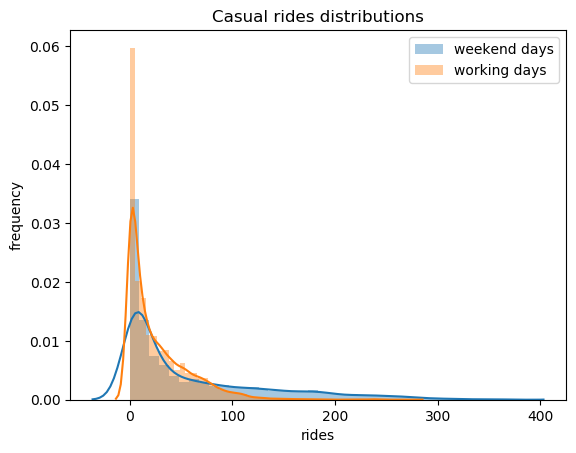

In [24]:
# select casual rides for the weekend and working days
weekend_data = pp_data.casual[weekend_mask]
workingdays_data = pp_data.casual[workingdays_mask]
# perform ttest
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")
# plot distributions of casual rides for working vs weekend days
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Casual rides distributions")

The p-value returned from the previous code is 0, providing strong evidence against the null hypothesis, 
We can conclude that casual customers also behave differently over the weekend; in this case, they tend to use the bike-sharing service more, as seen in the previous plot.

### In summary, we can say that there is a statistically significant difference between the number of rides on working days and weekends for both casual and registered customers.

## Analysis of Weather-Related Features

In [25]:
def plot_correlations(data, col):
# get correlation between col and registered rides
    corr_r = np.corrcoef(data[col], data["registered"])[0,1]
    ax = sns.regplot(x=col, y="registered", data=data, \
    scatter_kws={"alpha":0.05}, \
    label=f"Registered rides (correlation: {corr_r:.3f})")
# get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data["casual"])[0,1]
    ax = sns.regplot(x=col, y='casual', data=data, \
    scatter_kws={"alpha":0.05}, \
    label=f"Casual rides (correlation: {corr_c:.3f})")
#adjust legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)
        ax.set_ylabel("rides")
        ax.set_title(f"Correlation between rides and {col}")
    return ax

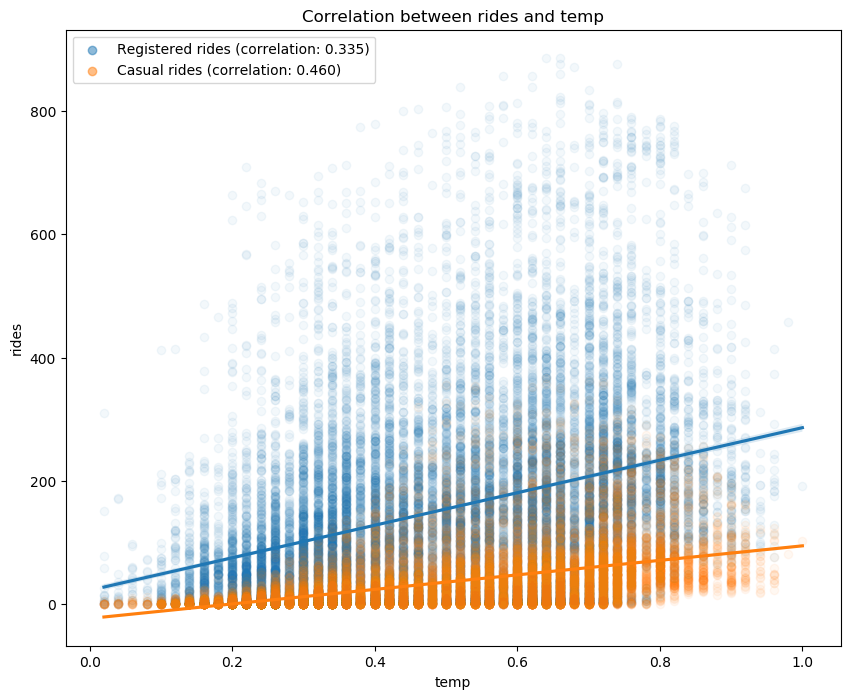

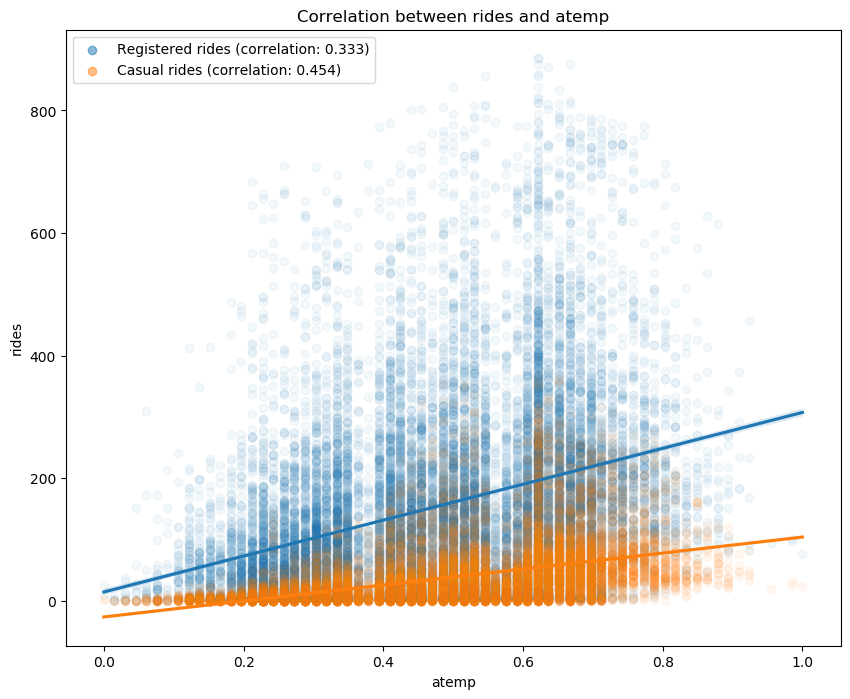

In [26]:
plt.figure(figsize=(10,8))
ax = plot_correlations(pp_data, 'temp')
plt.figure(figsize=(10,8))
ax = plot_correlations(pp_data, 'atemp')

### From the above plot, there is a positive correlation between the number of rides and the temperatures. 
### In higher temperatures, customers tend to use the bike-sharing service more, both for registered and casual users.
### Note :  The correlation between registered and casual rides and temperature is 0.335 and 0.46, respectively.
### The values for registered rides are widely spread with respect to the different values in the temperature column, resulting in a lower correlation compared to casual rides (the same applies to the 'atemp' plot).

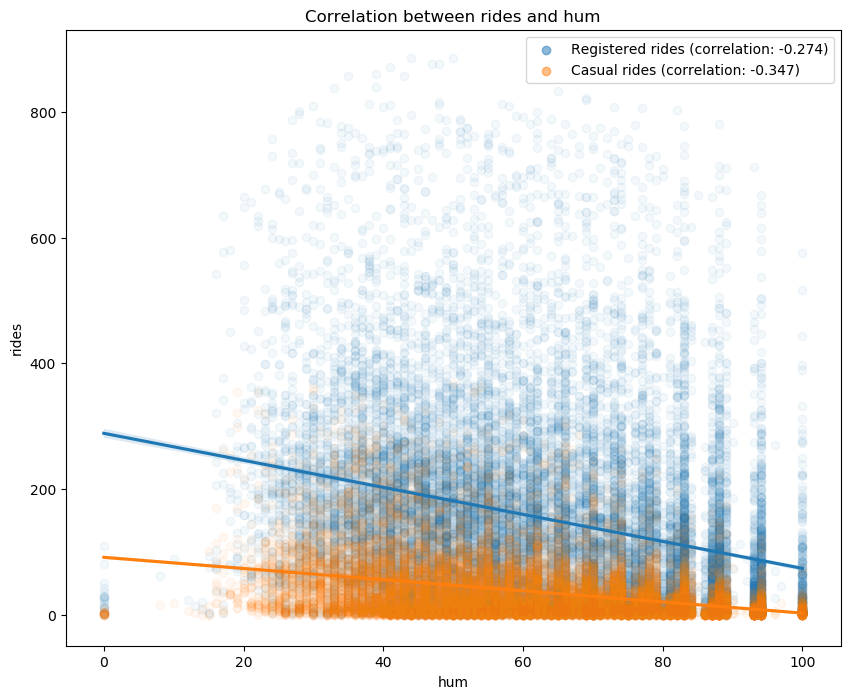

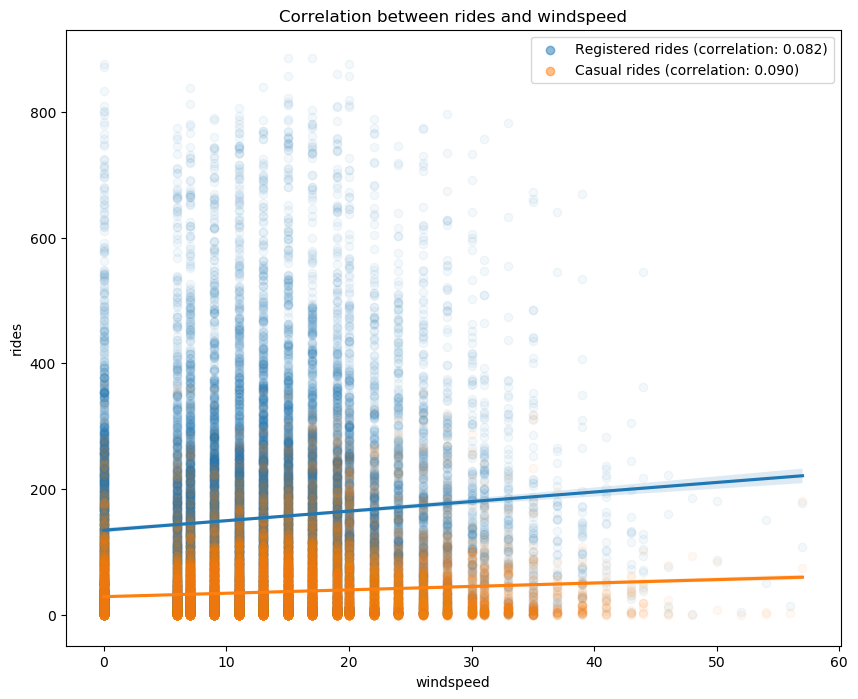

In [27]:
plt.figure(figsize=(10,8))
ax = plot_correlations(pp_data, 'hum')

plt.figure(figsize=(10,8))
ax = plot_correlations(pp_data, 'windspeed')

### From the above plot, there is a negative correlation between the number of rides and humidity, indicating that at higher humidity levels, customers are less likely to use the bike-sharing service, this holds true for both registered and casual riders.

### There is a weak positive correlation between the number of rides and windspeed.

## Evaluating the Difference between the Pearsonand Spearman Correlations

In [44]:
# define function for computing correlations
from scipy.stats import pearsonr, spearmanr
def compute_correlations(data, col):
    pearson_reg = pearsonr(data[col], data["registered"])[0]
    pearson_cas = pearsonr(data[col], data["casual"])[0]
    spearman_reg = spearmanr(data[col], data["registered"])[0]
    spearman_cas = spearmanr(data[col], data["casual"])[0]
    return pd.Series({"Pearson (registered)": pearson_reg,"Spearman (registered)": spearman_reg,\
                  "Pearson (casual)": pearson_cas,"Spearman (casual)": spearman_cas})

In [46]:
# compute correlation measures between different features
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data = pd.DataFrame(index=["Pearson (registered)", "Spearman (registered)",\
               "Pearson (casual)", "Spearman (casual)"])
for col in cols:
    corr_data[col]=compute_correlations(pp_data, col)
corr_data.T

,Pearson (registered),Spearman (registered),Pearson (casual),Spearman (casual)
temp,0.335361,0.373196,0.459616,0.570989
atemp,0.332559,0.373014,0.454080,0.570419
hum,-0.273933,-0.338480,-0.347028,-0.388213
windspeed,0.082321,0.122936,0.090287,0.122920


##### An interpretation of this result is that casual customers are far keener on using the bike sharing service when temperatures are higher. 
##### We have already seen from our previous analysis that casual customers ride mostly during the weekend, 
##### and they do not rely on bike sharing services for commuting to work. 
##### This conclusion is again confirmed by the strong relationship with temperature, as opposed to registered
##### customers, whose rides have a weaker correlation with temperature.

## Time Series Analysis

### First, we want to determine whether the time series is stationary or not. We will plot the rolling mean and standard deviation to visually identify whether these values fluctuate around a constant without large deviations, we will then verify this by conducting a Dickey-Fuller Test, which checks if the time series is stationary or not.

In [47]:
"""
define function for plotting rolling statistics and ADF test for time
series
"""
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts, window=10, **kwargs):
# create dataframe for plotting
    plot_data = pd.DataFrame(ts)
    plot_data['rolling_mean'] = ts.rolling(window).mean() 
    plot_data['rolling_std'] = ts.rolling(window).std()
# compute p-value of Dickey-Fuller test
    p_val = adfuller(ts)[1]
    ax = plot_data.plot(**kwargs)
    ax.set_title(f"Dickey-Fuller p-value: {p_val:.3f}")

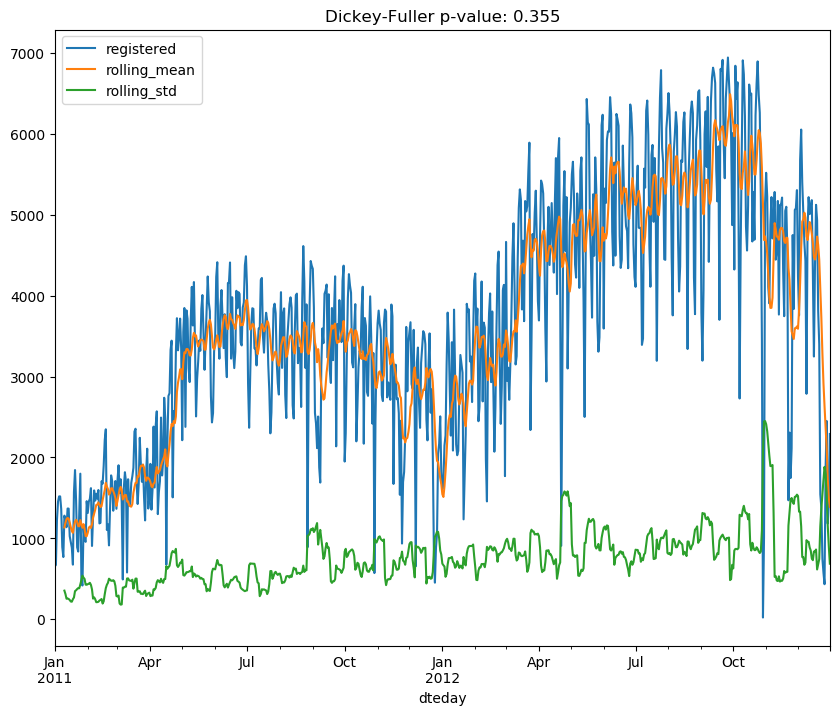

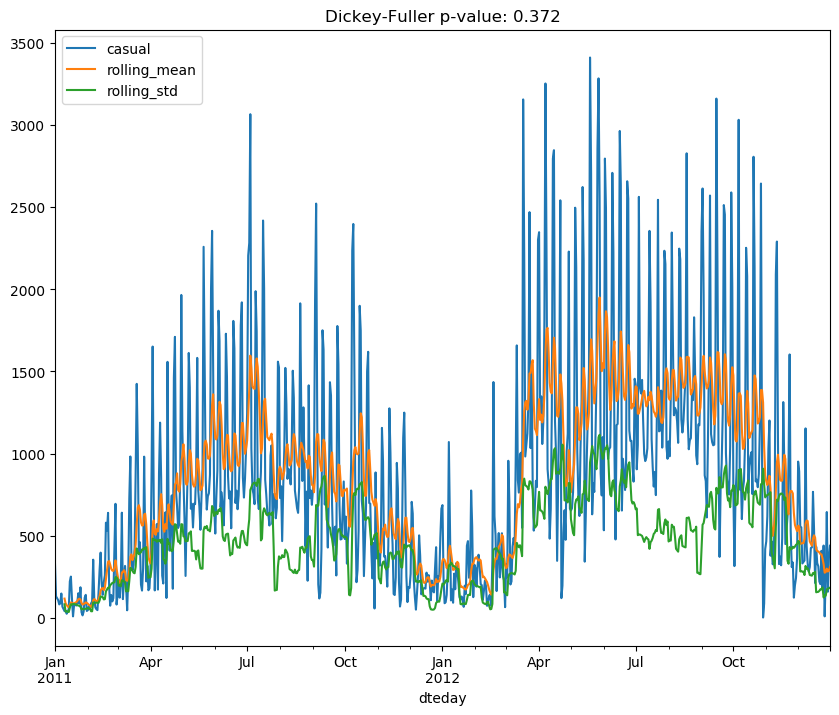

In [48]:
# get daily rides
daily_rides = pp_data[["dteday", "registered", "casual"]]
daily_rides = daily_rides.groupby("dteday").sum()

# convert index to DateTime object
daily_rides.index = pd.to_datetime(daily_rides.index)
#plt.figure()
test_stationarity(daily_rides["registered"],figsize=(10,8))
test_stationarity(daily_rides["casual"],figsize=(10,8))

### From our plots, we observe that neither the moving average nor the standard deviation is stationary. Additionally, the p-value for both registered and casual is larger than 0.05, providing strong evidence to accept the null hypothesis. 
### Therefore, the two time series are not stationary.

### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

### To detrend our time series and make it stationary we will use two methods and compare the results 

<Figure size 640x480 with 0 Axes>

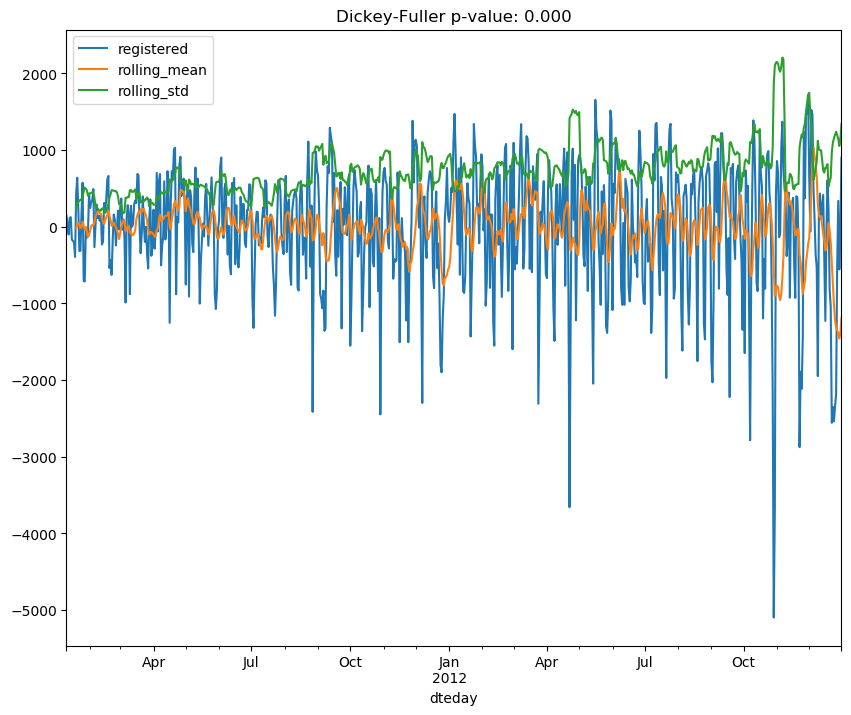

<Figure size 640x480 with 0 Axes>

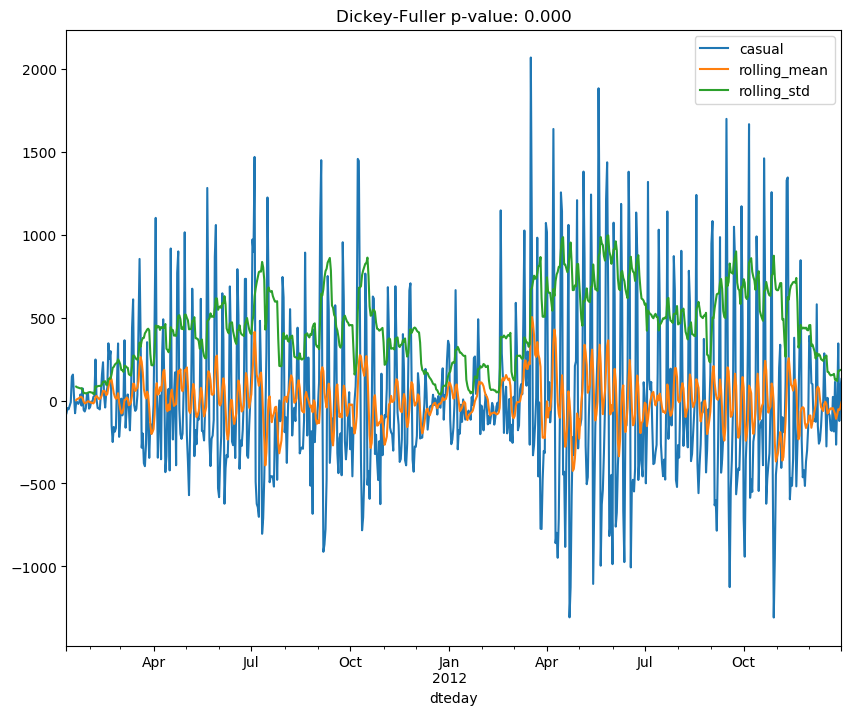

In [49]:
# subtract rolling mean
registered = daily_rides["registered"]
registered_ma = registered.rolling(10).mean()
registered_ma_diff = registered - registered_ma
registered_ma_diff.dropna(inplace=True)

casual = daily_rides["casual"]
casual_ma = casual.rolling(10).mean()
casual_ma_diff = casual - casual_ma
casual_ma_diff.dropna(inplace=True)
plt.figure()
test_stationarity(registered_ma_diff, figsize=(10, 8))
plt.figure()
test_stationarity(casual_ma_diff, figsize=(10, 8))

#### According to our plots, after subtracting the rolling mean, it appears stationary. We then test the stationarity of our data using the Dickey-Fuller test. The p-value is 0.000, which is less than our significance level of 0.05. Therefore, we accept the alternative hypothesis (the data is stationary), as we planned to do.
#### A possible interpretation, relative to our data, is that the number of casual rides increases during summer periods and drops during the winter.

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
registered_decomposition = seasonal_decompose(daily_rides["registered"])
casual_decomposition = seasonal_decompose(daily_rides["casual"])

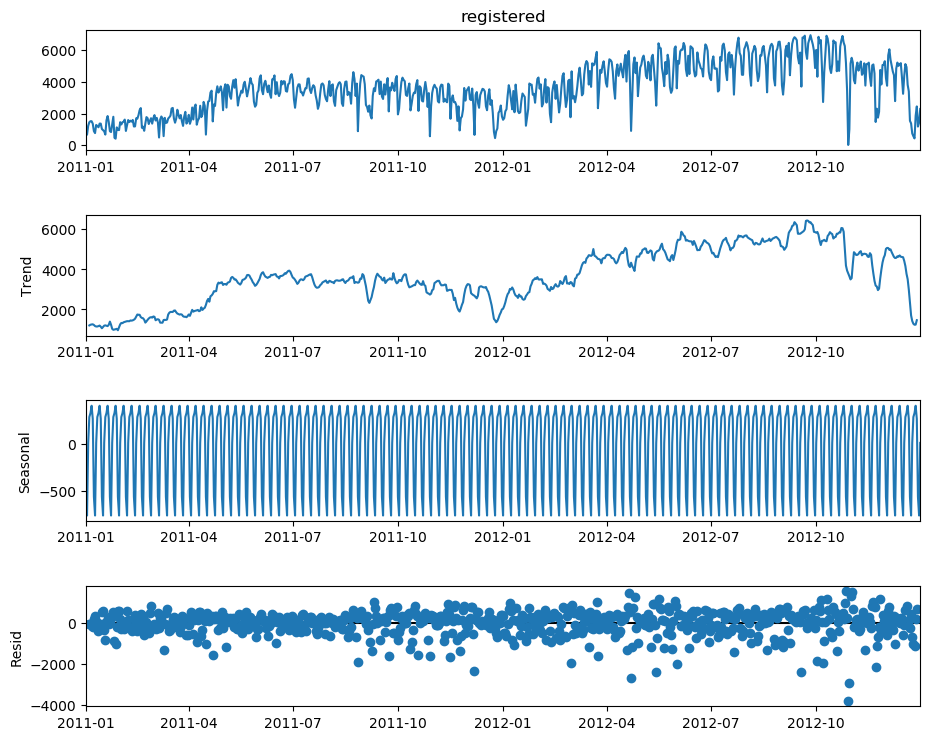

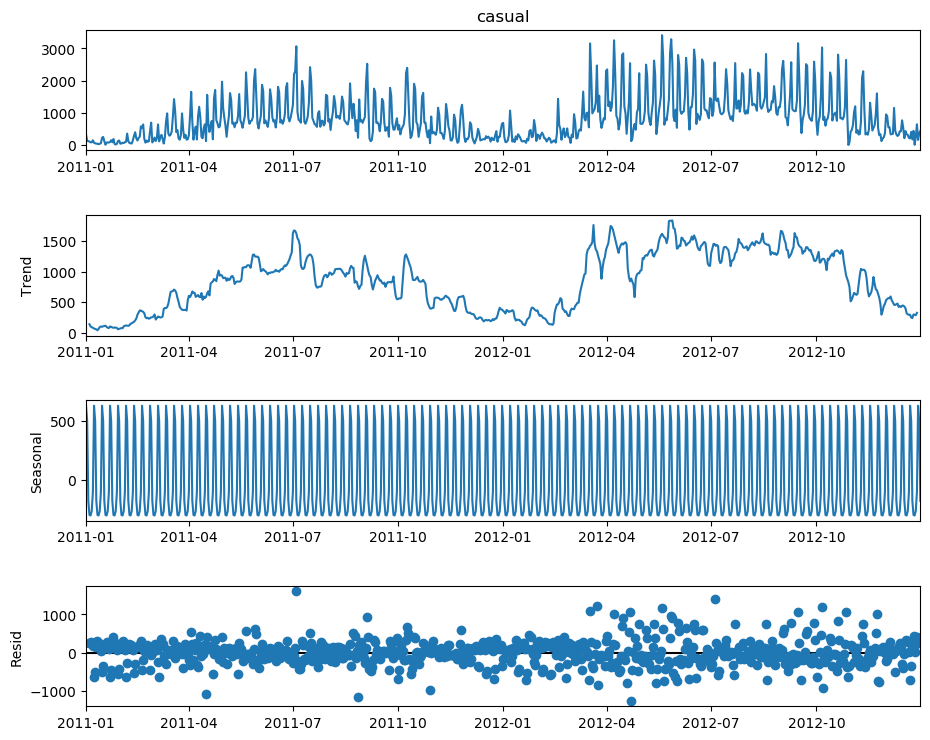

In [51]:
# plot decompositions
registered_plot = registered_decomposition.plot()
registered_plot.set_size_inches(10,8)

casual_plot = casual_decomposition.plot()
casual_plot.set_size_inches(10,8)

<Figure size 640x480 with 0 Axes>

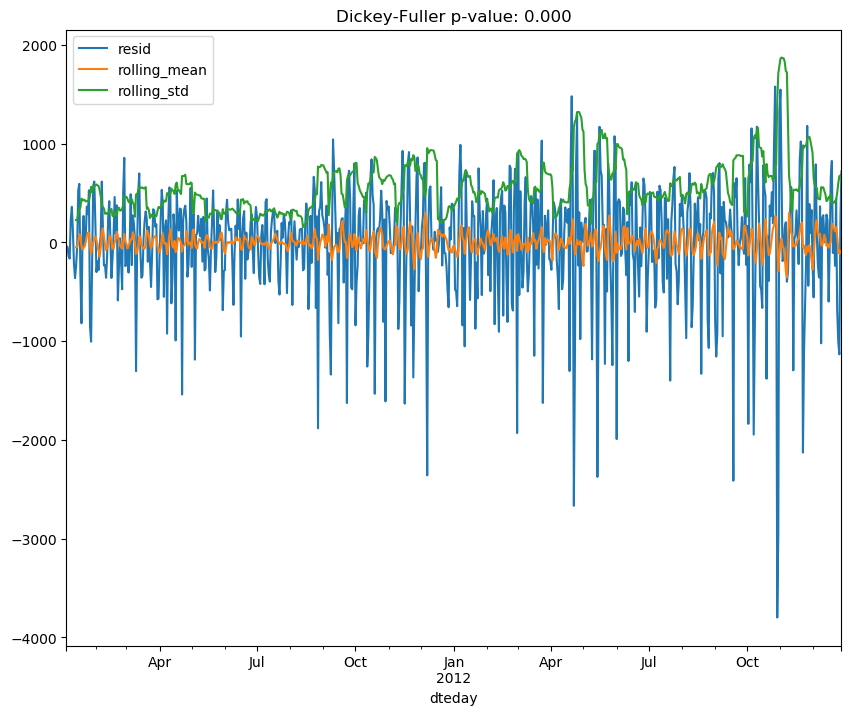

<Figure size 640x480 with 0 Axes>

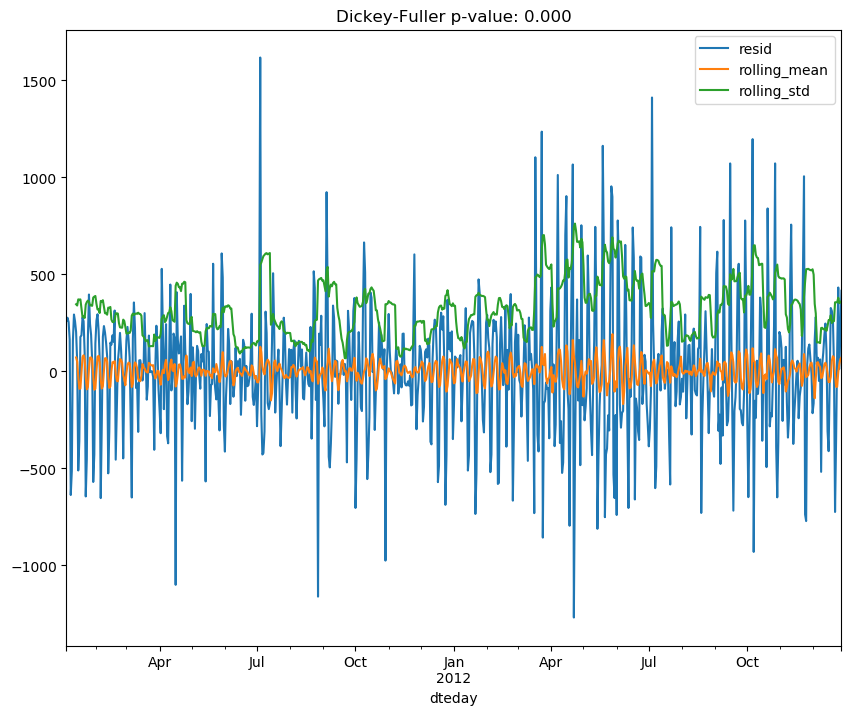

In [52]:
# test residuals for stationarity
plt.figure()
test_stationarity(registered_decomposition.resid.dropna(),figsize=(10, 8))
                                                                   
plt.figure()
test_stationarity(casual_decomposition.resid.dropna(),figsize=(10, 8))

### After applying the Seasonal Decomposition method, it provides results that align closely with our insights, indicating that the number of casual rides increases during summer periods and decreases during the winter.

### ------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Conclusion

### The number of registered customers is higher than that of casual users, and the majority of rides are taken by registered users.
### Weather conditions are the most significant factor influencing the number of rides, both for registered and casual users, in general.
### Most of the rides occur at the beginning and end of working hours each day.
### Casual users don't rely on bike-sharing services for commuting to work, so we suggest attracting them to use the service by offering discount codes or free rides to encourage them to become registered users, which will increase the number of rides.
  